<a href="https://colab.research.google.com/github/eilsam/estimasi-regresi/blob/main/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from scipy import stats

Load Data

In [ ]:
data = pd.read_csv("hipertensi2.csv",delimiter=",")

In [ ]:
data.head(10)

,no,tahun,desa,kode_desa,jumlah_penduduk,jumlah_estimasi_penderita,penderita_hipertensi,konsumsi_sayur,konsumsi_makanan_minuman_jadi,konsumsi_rokok
0,1,2019,sukosari,1,1853,547,66,3.31,16.97,5.04
1,2,2019,kedungsari,2,2544,726,80,3.31,16.97,5.04
2,3,2019,salamkanci,3,4120,1194,175,3.31,16.97,5.04
3,4,2019,banyuwangi,4,6665,1892,136,3.31,16.97,5.04
4,5,2019,trasan,5,7543,2245,205,3.31,16.97,5.04
5,6,2019,bandongan,6,7034,2085,271,3.31,16.97,5.04
6,7,2019,sukodadi,7,2644,774,108,3.31,16.97,5.04
7,8,2019,tonoboyo,8,3462,973,134,3.31,16.97,5.04
8,9,2019,kebonagung,9,2930,843,91,3.31,16.97,5.04
9,10,2019,kalegen,10,3042,858,87,3.31,16.97,5.04


In [ ]:
data.shape

(70, 10)

Preprocessing

In [ ]:
#Cek missing value/nilai kosong
print("Jumlah missing value tiap kolom:")
print(data.isnull().sum())

Jumlah missing value tiap kolom:
no                               0
tahun                            0
desa                             0
kode_desa                        0
jumlah_penduduk                  0
jumlah_estimasi_penderita        0
penderita_hipertensi             0
konsumsi_sayur                   0
konsumsi_makanan_minuman_jadi    0
konsumsi_rokok                   0
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
#memilih kolom yang bernilai data angka saja
data = data.select_dtypes(include='number')
data

,no,tahun,kode_desa,jumlah_penduduk,jumlah_estimasi_penderita,penderita_hipertensi,konsumsi_sayur,konsumsi_makanan_minuman_jadi,konsumsi_rokok
0,1,2019,1,1853,547,66,3.31,16.97,5.04
1,2,2019,2,2544,726,80,3.31,16.97,5.04
2,3,2019,3,4120,1194,175,3.31,16.97,5.04
3,4,2019,4,6665,1892,136,3.31,16.97,5.04
4,5,2019,5,7543,2245,205,3.31,16.97,5.04
...,...,...,...,...,...,...,...,...,...
65,66,2023,10,3061,879,580,3.87,17.27,7.38
66,67,2023,11,4834,1380,449,3.87,17.27,7.38
67,68,2023,12,4843,1413,565,3.87,17.27,7.38
68,69,2023,13,3598,1038,500,3.87,17.27,7.38


In [ ]:
# Mengonversi semua kolom menjadi tipe numerik
data = data.apply(pd.to_numeric, errors='coerce')
print(data.dtypes)

no                                 int64
tahun                              int64
kode_desa                          int64
jumlah_penduduk                    int64
jumlah_estimasi_penderita          int64
penderita_hipertensi               int64
konsumsi_sayur                   float64
konsumsi_makanan_minuman_jadi    float64
konsumsi_rokok                   float64
dtype: object


Pergerakan Data dari 2019-2023

Pergerakan Jumlah Penderita Hipertensi per Tahun:
   tahun  penderita_hipertensi
0   2019                  1812
1   2020                  1169
2   2021                   891
3   2022                  3999
4   2023                  7383


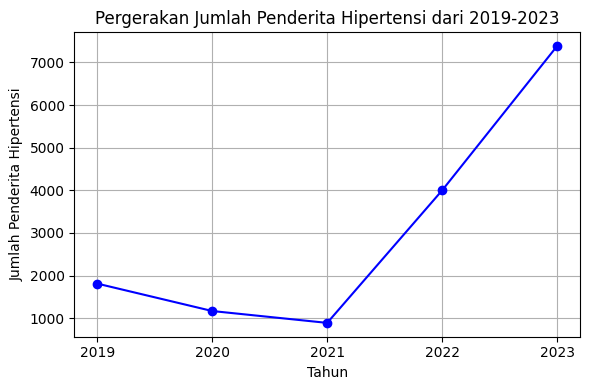

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menjumlahkan penderita hipertensi
grouped_data = data.groupby('tahun')['penderita_hipertensi'].sum().reset_index()

# Menampilkan hasil tabel pergerakan jumlah penderita hipertensi per tahun
print("Pergerakan Jumlah Penderita Hipertensi per Tahun:")
print(grouped_data)

# Visualisasi
plt.figure(figsize=(6, 4))

# Plotting total penderita hipertensi per tahun
plt.plot(grouped_data['tahun'], grouped_data['penderita_hipertensi'], marker='o',
         linestyle='-', color='b')
# Menambahkan detail pada plot
plt.title('Pergerakan Jumlah Penderita Hipertensi dari 2019-2023')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penderita Hipertensi')
plt.grid(True)
plt.xticks(grouped_data['tahun'])
plt.tight_layout()

Dari gambar di atas dapat dijelaskan mengenai penderita Hipertensi selama 5 tahun dari tahun 2019 sampai dengan 2023.
Pada tahun 2019 jumlah penderita Hipertensi sekitar 1800 an orang dan mengalam penurun sampai tahun 2021 sekitar 800 an penderita. Terjadi lonjakan penderita Hipertensi yang signifikan sampai tahun 2023 sebanyak 7383 pasien.  

Jumlah penduduk yang mengkonsumsi sayur
   tahun  jumlah_penduduk_konsumsi_sayur
0   2019                            2077
1   2020                            2419
2   2021                            2873
3   2022                            2736
4   2023                            2442


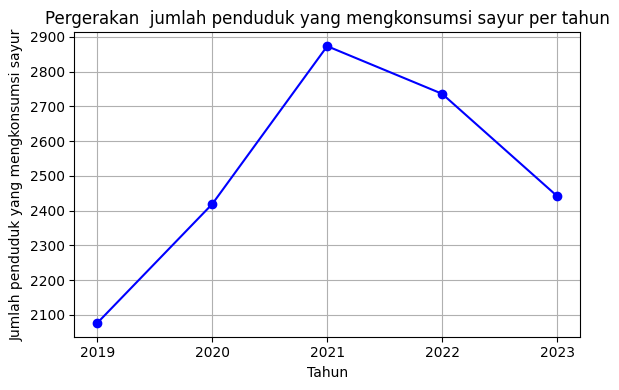

In [ ]:
# Tambah kolom baru untuk penduduk yang mengkonsumsi sayur
data['jumlah_penduduk_konsumsi_sayur'] = (data['jumlah_penduduk']*(data['konsumsi_sayur']
                                                                   /100)).astype(int)
# Visualisasi
plt.figure(figsize=(6, 4))

# Plotting total penderita hipertensi per tahun
grouped_data = data.groupby('tahun')['jumlah_penduduk_konsumsi_sayur'].sum().reset_index()
print('Jumlah penduduk yang mengkonsumsi sayur')
print(grouped_data)

plt.plot(grouped_data['tahun'], grouped_data['jumlah_penduduk_konsumsi_sayur'],
         marker='o', linestyle='-', color='b')
# Menambahkan detail pada plot
plt.title('Pergerakan  jumlah penduduk yang mengkonsumsi sayur per tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah penduduk yang mengkonsumsi sayur')
plt.grid(True)
plt.xticks(grouped_data['tahun'])
plt.tight_layout()

Jumlah penduduk yang mengkonsumsi makanan minuman jadi
   tahun  jumlah_penduduk_konsumsi_makanan_minuman_jadi
0   2019                                          10685
1   2020                                          10093
2   2021                                           9223
3   2022                                           9729
4   2023                                          10920


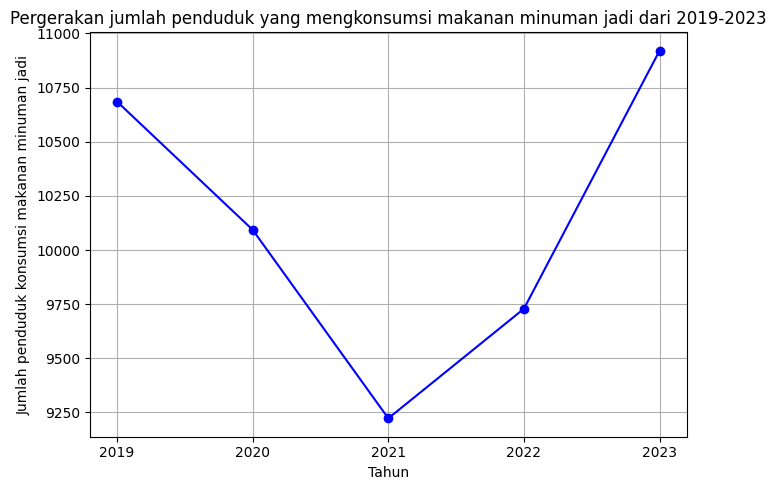

In [ ]:
# Tambah kolom baru untuk konsumsi makanan minuman jadi
data['jumlah_penduduk_konsumsi_makanan_minuman_jadi'] =
 (data['jumlah_penduduk']*(data['konsumsi_makanan_minuman_jadi']/100)).astype(int)
# Visualisasi
plt.figure(figsize=(7, 5))

# Plotting total penderita hipertensi per tahun
grouped_data = data.groupby('tahun')['jumlah_penduduk_konsumsi_makanan_minuman_jadi'].
  sum().reset_index()
print('Jumlah penduduk yang mengkonsumsi makanan minuman jadi')
print(grouped_data)

plt.plot(grouped_data['tahun'], grouped_data['jumlah_penduduk_konsumsi_makanan_minuman_jadi'],
         marker='o', linestyle='-', color='b')
# Menambahkan detail pada plot
plt.title('Pergerakan jumlah penduduk yang mengkonsumsi makanan minuman jadi dari 2019-2023')
plt.xlabel('Tahun')
plt.ylabel('Jumlah penduduk konsumsi makanan minuman jadi')
plt.grid(True)
plt.xticks(grouped_data['tahun'])
plt.tight_layout()

Jumlah penduduk yang mengkonsumsi rokok
   tahun  jumlah_penduduk_konsumsi_rokok
0   2019                            3169
1   2020                            3327
2   2021                            3759
3   2022                            4129
4   2023                            4662


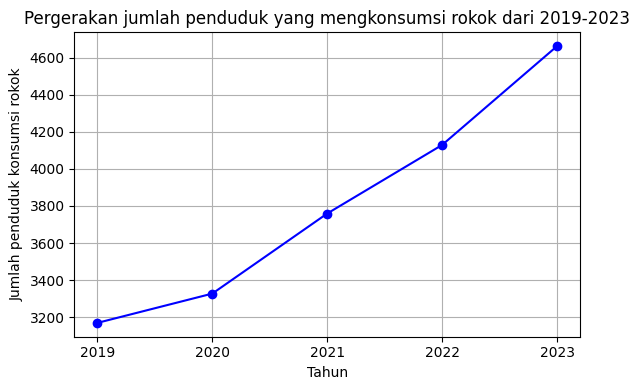

In [ ]:
# Tambah kolom baru untuk konsumsi rokok
data['jumlah_penduduk_konsumsi_rokok'] = (data['jumlah_penduduk']*(data['konsumsi_rokok']/100)).astype(int)
# Visualisasi
plt.figure(figsize=(6, 4))

# Plotting total penderita hipertensi per tahun
grouped_data = data.groupby('tahun')['jumlah_penduduk_konsumsi_rokok'].sum().reset_index()
print('Jumlah penduduk yang mengkonsumsi rokok')
print(grouped_data)

plt.plot(grouped_data['tahun'], grouped_data['jumlah_penduduk_konsumsi_rokok'], marker='o', linestyle='-', color='b')
# Menambahkan detail pada plot
plt.title('Pergerakan jumlah penduduk yang mengkonsumsi rokok dari 2019-2023')
plt.xlabel('Tahun')
plt.ylabel('Jumlah penduduk konsumsi rokok')
plt.grid(True)
plt.xticks(grouped_data['tahun'])
plt.tight_layout()

Uji Statistika & Korelasi Antar Variabel

In [ ]:
# Mengatur format tampilan dan lebar kolom
pd.set_option('display.float_format', '{:.0f}'.format)  # Atur format desimal ke 2 angka
pd.set_option('display.colheader_justify', 'right')     # Mengatur penempatan header kolom

# Menampilkan deskripsi data
description = data.describe()

# Mengatur tampilan lebih rapi
with pd.option_context('display.float_format', '{:.2f}'.format,
                       'display.colheader_justify', 'right'):
    print(description)

# Mengembalikan pengaturan ke default jika diperlukan
pd.reset_option('display.float_format')
pd.reset_option('display.colheader_justify')

         no   tahun  kode_desa  jumlah_penduduk  jumlah_estimasi_penderita  \
count 70.00   70.00      70.00            70.00                      70.00   
mean  35.50 2021.00       7.50          4484.49                    1300.67   
std   20.35    1.42       4.06          1961.23                     574.33   
min    1.00 2019.00       1.00          1840.00                     547.00   
25%   18.25 2020.00       4.00          2920.25                     843.25   
50%   35.50 2021.00       7.50          3846.50                    1116.00   
75%   52.75 2022.00      11.00          6649.00                    1892.00   
max   70.00 2023.00      14.00          8006.00                    2286.00   

       penderita_hipertensi  konsumsi_sayur  konsumsi_makanan_minuman_jadi  \
count                 70.00           70.00                          70.00   
mean                 217.91            4.01                          16.14   
std                  201.09            0.46                    

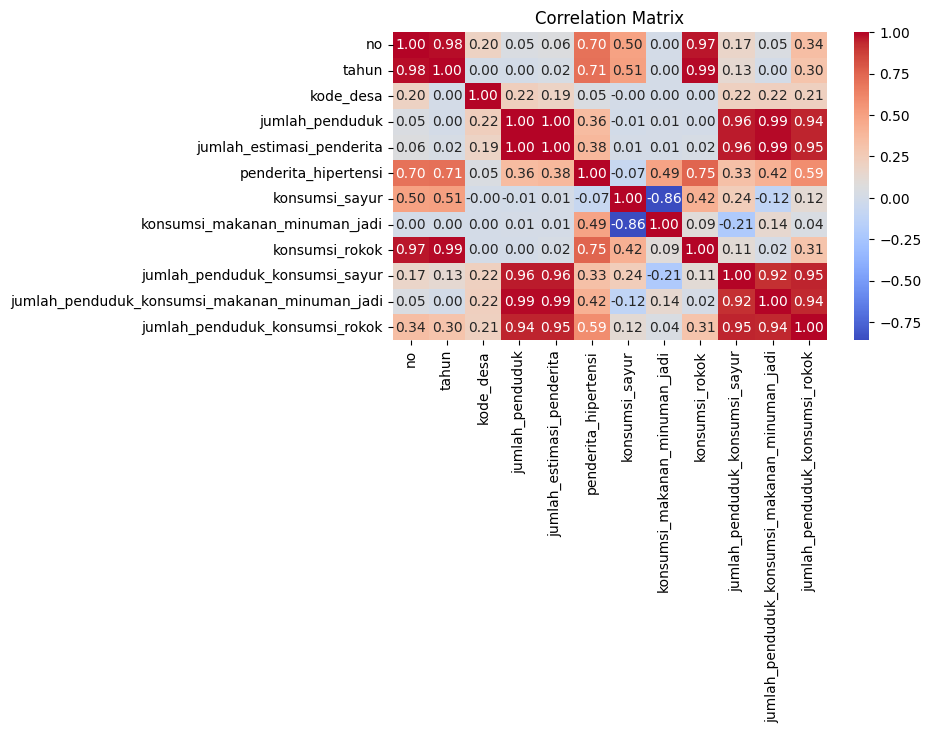

In [ ]:
#Korelasi antara variabel
correlation_matrix = data.corr()
plt.figure(figsize=(7,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Distribusi Normal

In [ ]:
# Mengatur agar semua kolom dan baris ditampilkan dengan format yang rapi
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah pemotongan tampilan data

# Mengelompokkan data berdasarkan tahun dan menghitung deskripsi statistik
distribusi_normal = data.groupby('tahun')[['konsumsi_sayur',
                                           'konsumsi_makanan_minuman_jadi',
                                           'konsumsi_rokok',
                                           'penderita_hipertensi']].describe()

# Membulatkan angka deskripsi statistik ke 2 desimal untuk tampilan yang lebih rapi
distribusi_normal = distribusi_normal.round(2)

# Mengubah format agar output ditampilkan ke bawah
distribusi_normal_vertical = distribusi_normal.transpose()

# Menampilkan hasil deskripsi statistik
print(distribusi_normal_vertical)

tahun                                  2019    2020    2021    2022    2023
konsumsi_sayur                count   14.00   14.00   14.00   14.00   14.00
                              mean     3.31    3.87    4.62    4.38    3.87
                              std      0.00    0.00    0.00    0.00    0.00
                              min      3.31    3.87    4.62    4.38    3.87
                              25%      3.31    3.87    4.62    4.38    3.87
                              50%      3.31    3.87    4.62    4.38    3.87
                              75%      3.31    3.87    4.62    4.38    3.87
                              max      3.31    3.87    4.62    4.38    3.87
konsumsi_makanan_minuman_jadi count   14.00   14.00   14.00   14.00   14.00
                              mean    16.97   16.12   14.81   15.54   17.27
                              std      0.00    0.00    0.00    0.00    0.00
                              min     16.97   16.12   14.81   15.54   17.27
            

<ipython-input-16-2796494124>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = data.groupby('tahun_grup')[column]


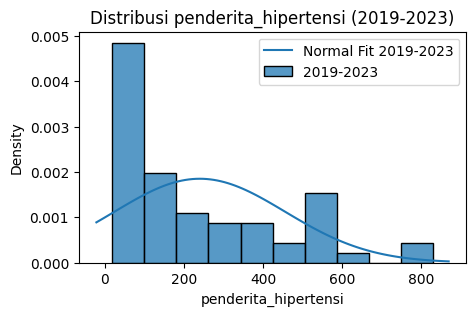

<ipython-input-16-2796494124>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = data.groupby('tahun_grup')[column]


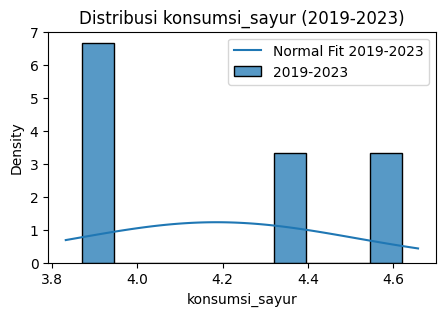

<ipython-input-16-2796494124>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = data.groupby('tahun_grup')[column]


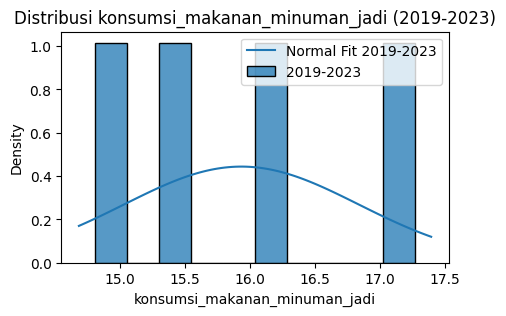

<ipython-input-16-2796494124>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = data.groupby('tahun_grup')[column]


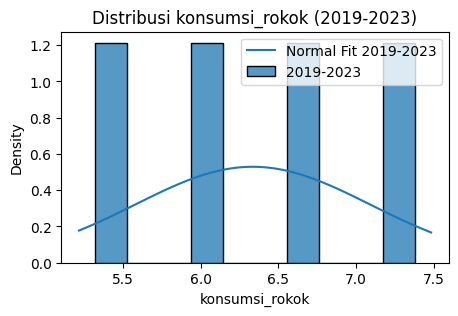

In [ ]:
from scipy.stats import norm

# Define the columns to plot
columns_to_plot = ['penderita_hipertensi', 'konsumsi_sayur',
                   'konsumsi_makanan_minuman_jadi', 'konsumsi_rokok']

# Group data into 5-year periods
data['tahun_grup'] = pd.cut(data['tahun'], bins=[2019, 2023], labels=['2019-2023'])

# Set up the matplotlib figure for each column separately
for column in columns_to_plot:
    plt.figure(figsize=(5, 3))

    # Group data by 5-year periods for the current column
    subset = data.groupby('tahun_grup')[column]

    # Plot the histogram for each 5-year group
    for group, values in subset:
        sns.histplot(values, kde=False, stat="density", bins=10, label=group)

        # Plot the normal distribution curve
        mu, std = norm.fit(values.dropna())
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, label=f"Normal Fit {group}")

    # Set labels and title for each column
    plt.title(f'Distribusi {column} (2019-2023)')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

Uji T

In [ ]:
# Definisikan variabel yang akan diuji
variables = ['konsumsi_sayur', 'konsumsi_makanan_minuman_jadi', 'konsumsi_rokok',
             'penderita_hipertensi']

# Melakukan uji T satu sampel terhadap mean 0 untuk setiap variabel
for var in variables:
  t_stat, p_value = stats.ttest_1samp(data[var], 0)
  print(f"Uji T untuk {var} (mean != 0): t-stat = {t_stat:.4f}, p-value = {p_value:.3f}")

Uji T untuk konsumsi_sayur (mean != 0): t-stat = 73.0993, p-value = 0.000
Uji T untuk konsumsi_makanan_minuman_jadi (mean != 0): t-stat = 148.1616, p-value = 0.000
Uji T untuk konsumsi_rokok (mean != 0): t-stat = 59.3070, p-value = 0.000
Uji T untuk penderita_hipertensi (mean != 0): t-stat = 9.0668, p-value = 0.000


In [ ]:
# Simpan hasil uji T
results = {'variabel': [], 't_stat': [], 'p_value': []}

# Melakukan uji T satu sampel terhadap mean 0 untuk setiap variabel
for var in variables:
    t_stat, p_value = stats.ttest_1samp(data[var], 0)
    results['variabel'].append(var)
    results['t_stat'].append(t_stat)
    results['p_value'].append(p_value)

#Merubah hasil menjadi dataframe
results_df = pd.DataFrame(results)

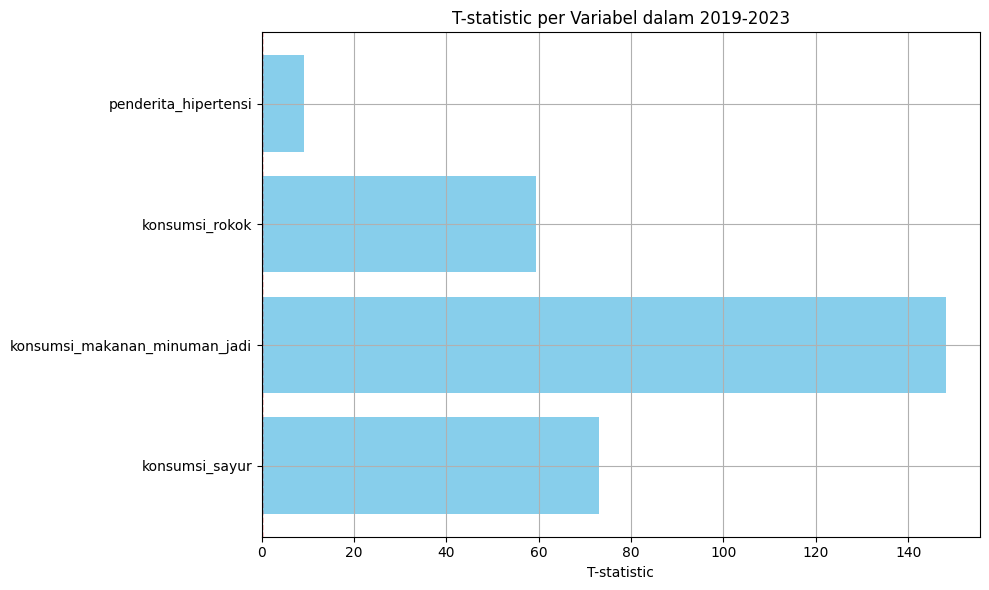

In [ ]:
plt.figure(figsize=(10, 6))

# Bar plot t-statistics
plt.barh(results_df['variabel'], results_df['t_stat'], color='skyblue')

# Menambahkan detail pada plot
plt.title('T-statistic per Variabel dalam 2019-2023')
plt.xlabel('T-statistic')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

Z Score

In [ ]:
# Menghitung Z-Score untuk setiap variabel
for var in variables[:-1]:  # Tidak menghitung Z-Score untuk penderita_hipertensi (y variable)
    data[f'z_score_{var}'] = (data[var] - data[var].mean()) / data[var].std()

# Tampilkan Z-Score
print(data[['tahun'] + [f'z_score_{var}' for var in variables[:-1]]])

    tahun  z_score_konsumsi_sayur  z_score_konsumsi_makanan_minuman_jadi  z_score_konsumsi_rokok
0    2019               -1.525169                               0.908363               -1.208645
1    2019               -1.525169                               0.908363               -1.208645
2    2019               -1.525169                               0.908363               -1.208645
3    2019               -1.525169                               0.908363               -1.208645
4    2019               -1.525169                               0.908363               -1.208645
..    ...                     ...                                    ...                     ...
65   2023               -0.305034                               1.237481                1.521306
66   2023               -0.305034                               1.237481                1.521306
67   2023               -0.305034                               1.237481                1.521306
68   2023               -0.305

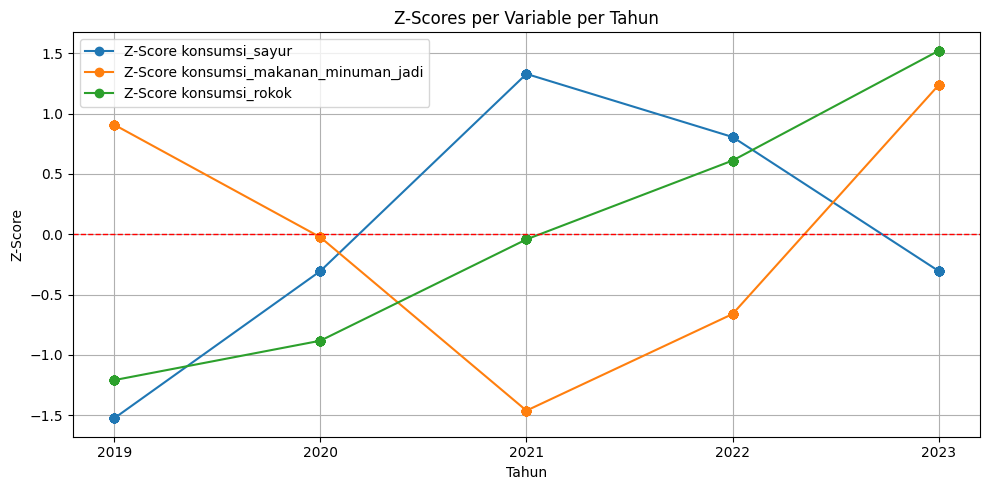

In [ ]:
plt.figure(figsize=(10, 5))

# Loop through each variable to plot the Z-scores
for var in variables[:-1]:
    plt.plot(data['tahun'], data[f'z_score_{var}'], marker='o', linestyle='-', label=f'Z-Score {var}')

# Menambahkan detail pada plot
plt.title('Z-Scores per Variable per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Z-Score')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Line for Z-score = 0
plt.grid(True)
plt.xticks(ticks=data['tahun'].unique())
plt.legend()
plt.tight_layout()
plt.show()

Menentukan Variabel X dan Y

In [ ]:
# Pilih variabel independen dan dependen
X = data[['konsumsi_sayur','konsumsi_makanan_minuman_jadi', 'konsumsi_rokok']]
y = data['penderita_hipertensi']

Data Training & Data Testing

In [ ]:
# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Penerapan Model Regresi Linear Berganda

In [ ]:
# Terapkan model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Lakukan prediksi pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi & Kesimpulan

In [ ]:
x = X_train.to_numpy()
y = y_train.to_numpy()
x = sm.add_constant(x)
model = sm.OLS(y, x).fit();
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     50.94
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           1.68e-15
Time:                        01:30:14   Log-Likelihood:                -340.76
No. Observations:                  56   AIC:                             689.5
Df Residuals:                      52   BIC:                             697.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1429.3701   3796.784      0.376      0.7

# Membandingkan Y Actual dan Y Predict


In [ ]:
df_best_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_best_predict.head(10)

,Actual,Predicted
22,45,66.349099
0,66,140.378956
49,212,260.198993
4,205,140.378956
54,301,260.198993
18,126,66.349099
10,60,140.378956
33,185,74.163486
45,384,260.198993
12,115,140.378956


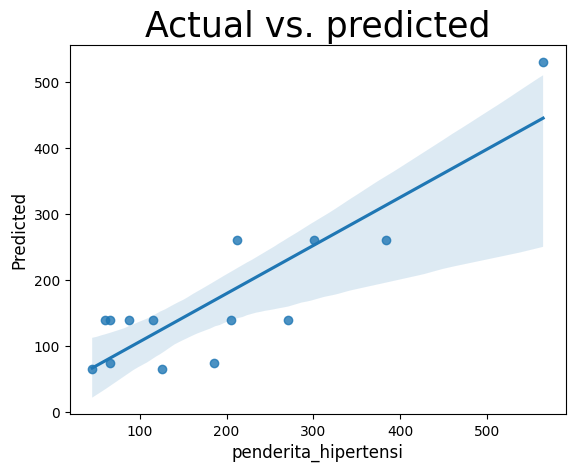

In [ ]:
#Plot actual vs predicted value plt.figure(figsize=(7,4))
plt.title("Actual vs. predicted", fontsize=25)
plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)
sns.regplot(x=y_test, y=y_pred)
plt.show()

# ANALISIS MULTIVARIAT

In [ ]:
# Menentukan variabel independen (X) dan dependen (y)
X_multivariat = data[['konsumsi_sayur', 'konsumsi_makanan_minuman_jadi', 'konsumsi_rokok']]
y_multivariat = data['penderita_hipertensi']

# Menambahkan konstanta untuk model
X_multivariat = sm.add_constant(X_multivariat)

# Membangun model a
model_multivariat = sm.OLS(y_multivariat, X_multivariat).fit()
# R-squared
r_squared = model_multivariat.rsquared
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.7476


In [ ]:
# Koefisien Regresi
coefficients = model_multivariat.params
print("\nRegression Coefficients:")
print(coefficients)


Regression Coefficients:
const                            1469.333359
konsumsi_sayur                   -388.320219
konsumsi_makanan_minuman_jadi     -83.626538
konsumsi_rokok                    272.489234
dtype: float64


In [ ]:
# Uji F
f_statistic = model_multivariat.fvalue
f_pvalue = model_multivariat.f_pvalue
print(f"\nF-statistic: {f_statistic:.4f}, p-value: {f_pvalue:.4f}")


F-statistic: 65.1777, p-value: 0.0000


# MSE, MAE, RMSE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_multivariat = model_multivariat.predict(X_multivariat)

# Menghitung MSE, MAE, and RMSE
mse = mean_squared_error(y_multivariat, y_pred_multivariat)
mae = mean_absolute_error(y_multivariat, y_pred_multivariat)
rmse = np.sqrt(mse)

# Print hasil perhitungan
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 10058.3680
Mean Absolute Error (MAE): 70.8449
Root Mean Squared Error (RMSE): 100.2914
